##Data Handling and Analysis in Python

In [2]:
# Import necessary libraries

import pandas as pd
import requests
import zipfile
import io

import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns


## === Download and import the Data Science Job Salary dataset.===

# Download and read the CSV from the ZIP file.

# URL of the ZIP (raw)
url = "https://github.com/devtlv/Datasets-DA-Bootcamp-2-/raw/main/Week%204%20-%20Data%20Understanding/W4D4%20-%20Data%20Preprocessing%20%26%20T/Data%20Science%20Job%20Salary%20dataset.zip"

# Download the ZIP file
r = requests.get(url)
r.raise_for_status()

# Open ZIP from memory
zip_file = zipfile.ZipFile(io.BytesIO(r.content))

# List files within the ZIP
print("Files in zip:", zip_file.namelist())

# Read the CSV file inside the ZIP
csv_file_name = zip_file.namelist()[0]  # 1° file
df = pd.read_csv(zip_file.open(csv_file_name))

# Check the first few rows
print(df.head())
print(df.info())



Files in zip: ['Data Science Job Salary dataset/datascience_salaries.csv']
   Unnamed: 0       job_title   job_type experience_level       location  \
0           0  Data scientist  Full Time           Senior  New York City   
1           2  Data scientist  Full Time           Senior         Boston   
2           3  Data scientist  Full Time           Senior         London   
3           4  Data scientist  Full Time           Senior         Boston   
4           5  Data scientist  Full Time           Senior  New York City   

  salary_currency  salary  
0             USD  149000  
1             USD  120000  
2             USD   68000  
3             USD  120000  
4             USD  149000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1171 non-null   int64 
 1   job_title         1171 non-null   object
 2   job_t

In [3]:
## === Normalize the salary column using Min-Max normalization, (scales all salary values between 0 and 1). ===

# Initialize scaler
scaler = MinMaxScaler()

# Apply to 'salary' column
df['salary_normalized'] = scaler.fit_transform(df[['salary']])

# Checking
print(df[['salary', 'salary_normalized']].head(10))
print(f"Min normalized salary: {df['salary_normalized'].min()}")
print(f"Max normalized salary: {df['salary_normalized'].max()}")



   salary  salary_normalized
0  149000           0.601010
1  120000           0.454545
2   68000           0.191919
3  120000           0.454545
4  149000           0.601010
5   68000           0.191919
6   69000           0.196970
7   68000           0.191919
8  140000           0.555556
9   68000           0.191919
Min normalized salary: 0.0
Max normalized salary: 1.0


In [4]:
## == Implement dimensionality reduction like Principal Component Analysis (PCA) or t-SNE to reduce the number of features (columns) in the dataset.

# Select numeric columns (except normalized salary)
numeric_cols = df.select_dtypes(include=np.number).drop(columns=['salary_normalized']).columns

X_numeric = df[numeric_cols]

# === PCA ===
pca = PCA(n_components=2)  # We reduced it to 2 components for visualization
X_pca = pca.fit_transform(X_numeric)

print("Explained variance ratio PCA:", pca.explained_variance_ratio_)

# Add PCA results to the dataframe
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]



# === t-SNE ===
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_numeric)

df['tSNE1'] = X_tsne[:,0]
df['tSNE2'] = X_tsne[:,1]


Explained variance ratio PCA: [9.99604599e-01 3.95400641e-04]


In [10]:
## ===Group the dataset by the ‘experience_level’ column and calculate the average and median salary for each experience level (Junior, Mid-level, Senior).

# Group by experience and calculate salary statistics
salary_stats = df.groupby('experience_level')['salary'].agg(['mean','median']).round(2)

print(salary_stats)



                      mean   median
experience_level                   
Entry             36111.11  30000.0
Executive         76076.92  46000.0
Mid               51786.89  51000.0
Senior            75088.03  68000.0


<>:7: SyntaxWarning: invalid escape sequence '\E'
<>:7: SyntaxWarning: invalid escape sequence '\E'
/tmp/ipython-input-129534642.py:7: SyntaxWarning: invalid escape sequence '\E'
  print ('n\Executives have the greatest salary variability, reflecting the wide range of positions and highly personalized compensation packages (bonuses, stock options, etc.) within this level. Other levels are more homogeneous, with more predictable salaries.')


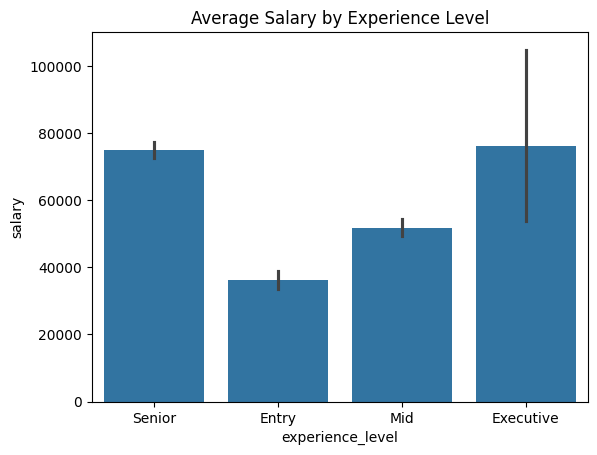

n\Executives have the greatest salary variability, reflecting the wide range of positions and highly personalized compensation packages (bonuses, stock options, etc.) within this level. Other levels are more homogeneous, with more predictable salaries.


In [8]:
## == Extra = Visualizations ==

sns.barplot(x='experience_level', y='salary', data=df, estimator=np.mean)
plt.title('Average Salary by Experience Level')
plt.show()

print ('n\Executives have the greatest salary variability, reflecting the wide range of positions and highly personalized compensation packages (bonuses, stock options, etc.) within this level. Other levels are more homogeneous, with more predictable salaries.')
